In [1]:
import pandas as pd

In [2]:
df_combined = pd.read_csv('my_data2.csv')

In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --quiet

ERROR: Operation cancelled by user
^C


In [4]:
df_combined

,review_content,label
0,...: هذا ليس بطيئًا مثل مراجعات الصحافة التي ج...,-1
1,يمكنها أن تفعل أفضل بكثير!: الكتابة المسطحة ، ...,-1
2,حتى أكثر مخيبة للآمال من الموسم الأول: نعم ، ت...,-1
3,dispointment الضخمة: لقد حصلت على هذا على أمل ...,-1
4,لا يعمل على الإطلاق: لقد قرأت المراجعة السيئة ...,-1
...,...,...
149995,Great meal with the family! Our first stop on ...,1
149996,Staying in St. Louis for the next week for Urb...,1
149997,An interesting combination of japanese street ...,1
149998,The wings are banging! I've only had the pizza...,1


In [3]:
from transformers import AutoTokenizer
import pandas as pd

model_name = "FacebookAI/xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

encodings = tokenizer(
    df_combined['review_content'].tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding='max_length',
    return_token_type_ids=True,
    return_attention_mask=True,
    return_tensors=None
)

df_combined['input_ids'] = encodings['input_ids']
df_combined['token_type_ids'] = encodings['token_type_ids']
df_combined['attention_mask'] = encodings['attention_mask']

print(df_combined.head(2))
print(df_combined.info())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                      review_content  label  \
0  ...: هذا ليس بطيئًا مثل مراجعات الصحافة التي ج...     -1   
1  يمكنها أن تفعل أفضل بكثير!: الكتابة المسطحة ، ...     -1   

                                           input_ids  \
0  [0, 153, 12, 2433, 22400, 73443, 179, 3239, 70...   
1  [0, 9959, 608, 862, 214248, 29235, 213772, 38,...   

                                      token_type_ids  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_content  150000 non-null  object
 1   label           150000 non-null  int64 
 2   input_ids   

In [6]:
df_combined

,review_content,label,input_ids,token_type_ids,attention_mask
0,...: هذا ليس بطيئًا مثل مراجعات الصحافة التي ج...,-1,"[2, 16, 16, 16, 28, 2158, 2517, 85167, 1011, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,يمكنها أن تفعل أفضل بكثير!: الكتابة المسطحة ، ...,-1,"[2, 41565, 1946, 7513, 2751, 8861, 5, 28, 1208...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,حتى أكثر مخيبة للآمال من الموسم الأول: نعم ، ت...,-1,"[2, 2241, 2349, 94955, 1046, 87867, 1939, 4778...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,dispointment الضخمة: لقد حصلت على هذا على أمل ...,-1,"[2, 50619, 55257, 35367, 25064, 57874, 28, 333...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,لا يعمل على الإطلاق: لقد قرأت المراجعة السيئة ...,-1,"[2, 1956, 4457, 1977, 16160, 28, 3334, 8847, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...
149995,Great meal with the family! Our first stop on ...,1,"[2, 49464, 9904, 3097, 13496, 5331, 66880, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
149996,Staying in St. Louis for the next week for Urb...,1,"[2, 66293, 4372, 5047, 4946, 16, 10390, 1058, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
149997,An interesting combination of japanese street ...,1,"[2, 9764, 96564, 4372, 18134, 39325, 20224, 42...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
149998,The wings are banging! I've only had the pizza...,1,"[2, 5331, 42142, 82490, 21466, 70423, 88985, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [4]:
df_combined['label'] = df_combined['label'] + 1

print(df_combined['label'].value_counts())

label
0    50000
1    50000
2    50000
Name: count, dtype: int64


In [8]:
!pip install evaluate peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.12.0
    Uninstalling fsspec-2025.12.0:
      Successfully uninstalled fsspec-2025.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
from datasets import Dataset
import evaluate
from transformers import (
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    default_data_collator
)
from peft import LoraConfig, get_peft_model, TaskType

hf_dataset = Dataset.from_pandas(df_combined)


cols_to_keep = ['input_ids', 'attention_mask', 'token_type_ids', 'label']
hf_dataset = hf_dataset.select_columns([c for c in cols_to_keep if c in hf_dataset.column_names])

dataset_split = hf_dataset.train_test_split(test_size=0.1, seed=42)

print(f"Train size: {len(dataset_split['train'])}")

print(f"Test size: {len(dataset_split['test'])}")

Train size: 135000
Test size: 15000


In [6]:
model_name = "FacebookAI/xlm-roberta-base"
id2label = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
label2id = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=16,
    lora_alpha=32,
    lora_dropout=0.1
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 1,182,723 || all params: 279,228,678 || trainable%: 0.4236


In [7]:
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=predictions, references=labels)
    f1_score = f1.compute(predictions=predictions, references=labels, average="weighted")
    return {**acc, **f1_score}

In [8]:
training_args = TrainingArguments(
    output_dir="./MARBERT_lora_finetuned",

    fp16=True,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    dataloader_num_workers=4,

    learning_rate=2e-4,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
    report_to="none"
)

In [9]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_split["train"],
    eval_dataset=dataset_split["test"],
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

In [10]:
print("Starting Training...")
trainer.train()

model.save_pretrained("./final_sentiment_lora_model3")
print("Model saved.")

Starting Training...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.461000,0.452422,0.818333,0.818949
2,0.438200,0.433409,0.826467,0.826926
3,0.404600,0.422335,0.829733,0.830442


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Model saved.


Running predictions on test set...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


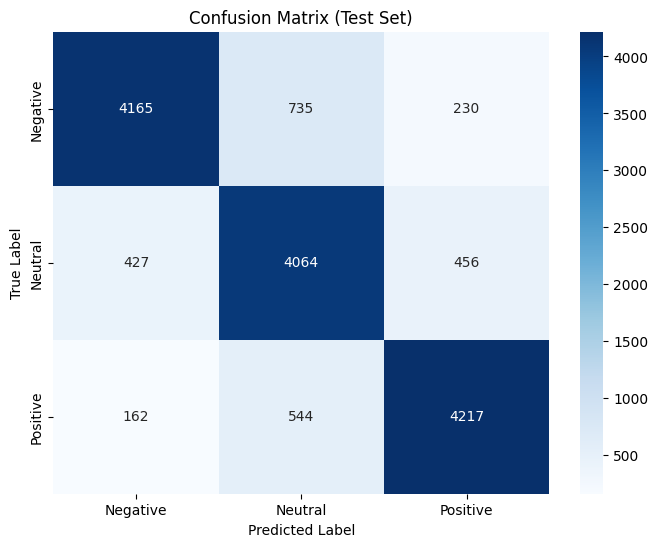


Classification Report:

              precision    recall  f1-score   support

    Negative       0.88      0.81      0.84      5130
     Neutral       0.76      0.82      0.79      4947
    Positive       0.86      0.86      0.86      4923

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


print("Running predictions on test set...")
predictions_output = trainer.predict(dataset_split["test"])


y_preds = np.argmax(predictions_output.predictions, axis=-1)
y_true = predictions_output.label_ids

class_names = ["Negative", "Neutral", "Positive"]

cm = confusion_matrix(y_true, y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_preds, target_names=class_names))

In [ ]:
model.save_pretrained("./final_gigabert_model")
tokenizer.save_pretrained("./final_gigabert_model")

In [16]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from peft import PeftModel

base_model_name = "FacebookAI/xlm-roberta-base"

adapter_path = "./final_sentiment_lora_model"

tokenizer = AutoTokenizer.from_pretrained(base_model_name)


id2label = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
label2id = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}

base_model = AutoModelForSequenceClassification.from_pretrained(
    base_model_name,
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

model = PeftModel.from_pretrained(base_model, adapter_path)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model.eval()

def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=128,
        padding=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)

    predicted_class_id = torch.argmax(probabilities, dim=-1).item()
    predicted_label = id2label[predicted_class_id]
    confidence = probabilities[0][predicted_class_id].item()

    return predicted_label, confidence



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Can't find 'adapter_config.json' at './final_sentiment_lora_model'

In [ ]:
test_sentence_1 = "المنتج كان amazing"
test_sentence_2 = "المنتج كان رائع"
test_sentence_3 = "The product was amazing"

print(f"Sentence: {test_sentence_1}")
print(f"Prediction: {predict_sentiment(test_sentence_1)}\n")

print(f"Sentence: {test_sentence_2}")
print(f"Prediction: {predict_sentiment(test_sentence_2)}\n")

print(f"Sentence: {test_sentence_3}")
print(f"Prediction: {predict_sentiment(test_sentence_3)}\n")

In [ ]:
test_sentence_1 = "المنتج كان حاجة تحفة"
test_sentence_2 = "the product was روعة"
test_sentence_3 = "The product was so bad"

print(f"Sentence: {test_sentence_1}")
print(f"Prediction: {predict_sentiment(test_sentence_1)}\n")

print(f"Sentence: {test_sentence_2}")
print(f"Prediction: {predict_sentiment(test_sentence_2)}\n")

print(f"Sentence: {test_sentence_3}")
print(f"Prediction: {predict_sentiment(test_sentence_3)}\n")